# Chapter 16


# Machine Learning with OpenCV I


## Machine learning


- Supervised Machine Learning
  - Classification
    - Support Vector Machines
    - Nearest Neighbor
    - Neural Networks
  - Regression
    - Linear Regression
    - Devision Trees
    - Neural Networks
- Unsupervised Machine Learning
  - Clustering
    - K-Means
    - Hidden Markov Models
    - Neural Networks
- Semi-Supervised Machine Learning


### Generate Sample Data


dtype:  float32


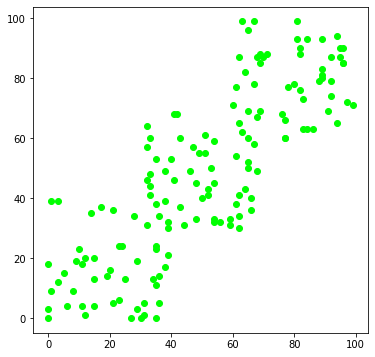

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# seed for constant dataset
np.random.seed(0)

def sampleData():
    # random integer data
    data = np.float32(np.vstack((np.random.randint(0, 40, (50, 2)), 
                                np.random.randint(30, 70, (50, 2)),
                                np.random.randint(60, 100, (50, 2)))
                                )) 

    return data


data = sampleData() 

print('dtype: ', data.dtype)

fig = plt.figure(figsize=(6, 6))
plt.scatter(data[:,0], data[:,1], c='lime')
plt.show()


## Display generate data

The best way apart from plotting is using pandas

In [14]:
print(data)

[[ 0.  3.]
 [ 3. 39.]
 [ 9. 19.]
 [21. 36.]
 [23.  6.]
 [24. 24.]
 [12.  1.]
 [38. 39.]
 [23. 24.]
 [17. 37.]
 [25. 13.]
 [ 8.  9.]
 [20. 16.]
 [ 5. 15.]
 [ 0. 18.]
 [35. 24.]
 [29. 19.]
 [19. 14.]
 [39. 32.]
 [ 1.  9.]
 [32. 31.]
 [10. 23.]
 [35. 11.]
 [28. 34.]
 [ 0.  0.]
 [36.  5.]
 [38. 17.]
 [15.  4.]
 [31.  1.]
 [ 1. 39.]
 [35. 38.]
 [11. 18.]
 [27.  0.]
 [14. 35.]
 [12. 20.]
 [11.  4.]
 [ 6.  4.]
 [ 3. 12.]
 [36. 14.]
 [15. 20.]
 [35. 23.]
 [15. 13.]
 [21.  5.]
 [35.  0.]
 [31.  5.]
 [30.  0.]
 [36. 34.]
 [29.  3.]
 [34. 13.]
 [39. 21.]
 [39. 30.]
 [40. 53.]
 [32. 64.]
 [65. 60.]
 [33. 48.]
 [65. 50.]
 [47. 57.]
 [44. 31.]
 [66. 40.]
 [52. 41.]
 [32. 46.]
 [62. 30.]
 [68. 49.]
 [43. 60.]
 [54. 32.]
 [33. 60.]
 [64. 43.]
 [38. 49.]
 [61. 38.]
 [56. 32.]
 [33. 44.]
 [62. 34.]
 [33. 41.]
 [52. 43.]
 [41. 46.]
 [54. 59.]
 [51. 55.]
 [46. 49.]
 [63. 62.]
 [66. 36.]
 [51. 61.]
 [43. 37.]
 [54. 45.]
 [48. 45.]
 [41. 68.]
 [59. 31.]
 [61. 54.]
 [54. 33.]
 [48. 33.]
 [42. 68.]
 [65. 52.]

In [15]:
np.transpose(data)

array([[ 0.,  3.,  9., 21., 23., 24., 12., 38., 23., 17., 25.,  8., 20.,
         5.,  0., 35., 29., 19., 39.,  1., 32., 10., 35., 28.,  0., 36.,
        38., 15., 31.,  1., 35., 11., 27., 14., 12., 11.,  6.,  3., 36.,
        15., 35., 15., 21., 35., 31., 30., 36., 29., 34., 39., 39., 40.,
        32., 65., 33., 65., 47., 44., 66., 52., 32., 62., 68., 43., 54.,
        33., 64., 38., 61., 56., 33., 62., 33., 52., 41., 54., 51., 46.,
        63., 66., 51., 43., 54., 48., 41., 59., 61., 54., 48., 42., 65.,
        35., 62., 50., 67., 32., 49., 53., 59., 65., 69., 83., 86., 91.,
        70., 67., 81., 94., 84., 65., 60., 94., 76., 61., 95., 96., 63.,
        95., 89., 78., 89., 62., 97., 62., 81., 99., 82., 77., 67., 88.,
        89., 69., 92., 69., 77., 82., 96., 84., 68., 89., 92., 68., 83.,
        77., 71., 96., 92., 82., 80., 64.],
       [ 3., 39., 19., 36.,  6., 24.,  1., 39., 24., 37., 13.,  9., 16.,
        15., 18., 24., 19., 14., 32.,  9., 31., 23., 11., 34.,  0.,  5.,
       

In [16]:
import pandas as pd

df = pd.DataFrame(data, columns=['x','y'])

df

,x,y
0,0.0,3.0
1,3.0,39.0
2,9.0,19.0
3,21.0,36.0
4,23.0,6.0
...,...,...
145,96.0,85.0
146,92.0,74.0
147,82.0,88.0
148,80.0,78.0


## K-Means Clustering


`compactness, bestLabels, centers = cv.kmeans(data, K, bestLabels, criteria, attempts, flags[, centers])`

- `data`: input data for clustering (np.float32 dtype)
- `K`: desired number of clusters
- `bestLabels`: cluster labels
- `criteria`: maximum iterations and/or accuracy
  - `type`: type of termination criteria
    - cv2.TERM_CRITERIA_EPS: The algorithm stops when the specified accuracy, epsilon, is reached. - cv2.TERM_CRITERIA_MAX_ITER: The algorithm stops when the specified number of iterations, max_iterm, is reached. - cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER:
      The algorithm stops when any of the two conditions is reached.
  - `max_iter`: maximum iterations
  - `epsilion`: accuracy
- `attempts`: number of times the algorithm is executed using diffrent initial labelings
- `flags`: specifies how initial centers are selected
  - cv2.KMEANS_RANDOM_CENTERS flag selects random initial centers in each attempt.
  - cv2.KMEANS_PP_CENTERS flag uses the k-means++ center initialization proposed by Arthur and Vassilvitskii
- `bestLabels`: array of integers, stores the cluster indices
- `centers`: Array that contains the center for each cluster
- `compactness`: The sum of the squared distance from each point to their corresponding centers


`criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)`

- `max_iter`: 20
- `epsilion`: 1


data:  (150, 2)
compactness:  77276.70889472961
label:  (150, 1)
center shape:  (2, 2)


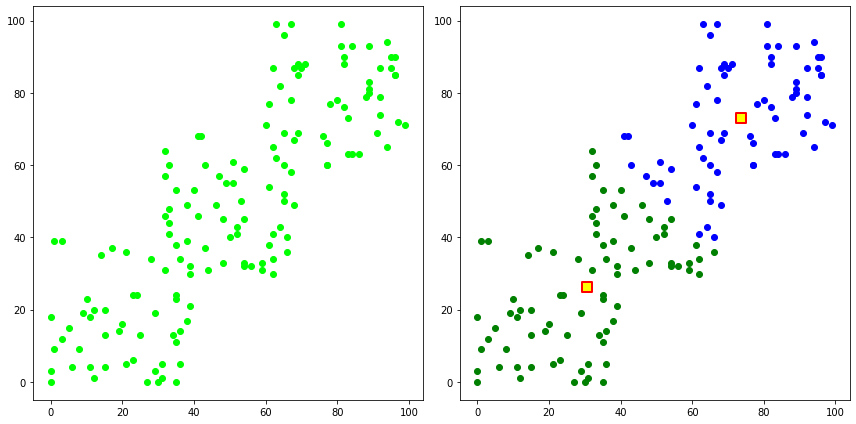

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# criteria 
max_iter = 20
epsilon = 1.0
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# cluster 
K = 2
compactness, label, center = cv.kmeans(data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

print('data: ', data.shape)
print('compactness: ', compactness)
print('label: ', label.shape)
print('center shape: ', center.shape)
print('center: ', center)

# make label single row
label_row = label.ravel()

# sort into group by using bool indexing
A = data[label_row == 0]
B = data[label_row == 1]


fig = plt.figure(figsize=(12, 6))

# plot original data
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], c='lime')

# plot clustered data
plt.subplot(122)
# plot each group
plt.scatter(A[:,0], A[:,1], c='b')
plt.scatter(B[:,0], B[:,1], c='g')
# plot the center
plt.scatter(center[:,0], center[:,1], s=100, c='yellow', marker='s', edgecolors='red', linewidths=2)

plt.tight_layout()
plt.show()


In [24]:
print('A =', A.T)
print('B =', B.T)


A = [[65. 65. 47. 66. 68. 43. 64. 54. 51. 63. 51. 41. 61. 42. 65. 62. 67. 49.
  53. 65. 69. 83. 86. 91. 70. 67. 81. 94. 84. 65. 60. 94. 76. 61. 95. 96.
  63. 95. 89. 78. 89. 62. 97. 62. 81. 99. 82. 77. 67. 88. 89. 69. 92. 69.
  77. 82. 96. 84. 68. 89. 92. 68. 83. 77. 71. 96. 92. 82. 80. 64.]
 [60. 50. 57. 40. 49. 60. 43. 59. 55. 62. 61. 68. 54. 68. 52. 41. 58. 55.
  50. 69. 69. 63. 63. 69. 87. 99. 93. 94. 93. 96. 71. 65. 68. 77. 87. 85.
  99. 90. 93. 77. 80. 65. 72. 87. 99. 71. 90. 66. 78. 79. 81. 85. 87. 88.
  60. 76. 90. 63. 87. 83. 79. 67. 73. 60. 88. 85. 74. 88. 78. 82.]]
B = [[ 0.  3.  9. 21. 23. 24. 12. 38. 23. 17. 25.  8. 20.  5.  0. 35. 29. 19.
  39.  1. 32. 10. 35. 28.  0. 36. 38. 15. 31.  1. 35. 11. 27. 14. 12. 11.
   6.  3. 36. 15. 35. 15. 21. 35. 31. 30. 36. 29. 34. 39. 39. 40. 32. 33.
  44. 52. 32. 62. 54. 33. 38. 61. 56. 33. 62. 33. 52. 41. 46. 66. 43. 54.
  48. 59. 54. 48. 35. 50. 32. 59.]
 [ 3. 39. 19. 36.  6. 24.  1. 39. 24. 37. 13.  9. 16. 15. 18. 24. 19. 14.
  32.  9

Add label to dataframe

In [25]:
df['label'] = label_row.T

df

,x,y,label
0,0.0,3.0,1
1,3.0,39.0,1
2,9.0,19.0,1
3,21.0,36.0,1
4,23.0,6.0,1
...,...,...,...
145,96.0,85.0,0
146,92.0,74.0,0
147,82.0,88.0,0
148,80.0,78.0,0


Group into three (3)

data:  (150, 2)
compactness:  39037.733750641346
label:  (150, 1)
center shape:  (3, 2)
center:  [[19.652174 15.239131]
 [80.479996 80.06    ]
 [49.592594 46.37037 ]]


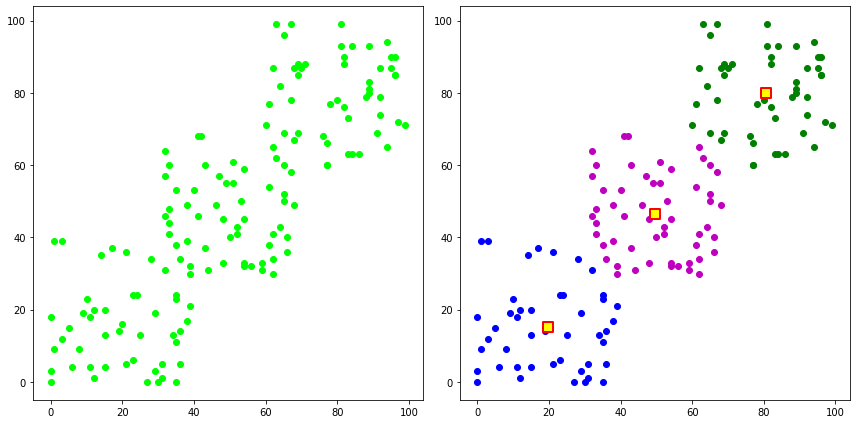

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# criteria 
max_iter = 20
epsilon = 1.0
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# cluster 
K = 3
compactness, label, center = cv.kmeans(data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

print('data: ', data.shape)
print('compactness: ', compactness)
print('label: ', label.shape)
print('center shape: ', center.shape)
print('center: ', center)

# make label single row
label_row = label.ravel()

# sort into group by using bool indexing
A = data[label_row == 0]
B = data[label_row == 1]
C = data[label_row == 2]


fig = plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(data[:,0], data[:,1], c='lime')

# plot clustered data
plt.subplot(122)
plt.scatter(A[:,0], A[:,1], c='b')
plt.scatter(B[:,0], B[:,1], c='g')
plt.scatter(C[:,0], C[:,1], c='m')
plt.scatter(center[:,0], center[:,1], s=100, c='yellow', marker='s', edgecolors='red', linewidths=2)

plt.tight_layout()
plt.show()


## Class Activity

Cluster the data into four (4).   
Let the seed=9 and generate randomint (0, 100) data of shape (200,2). 


data:  (200, 2)
compactness:  84956.49410595
label:  (200, 1)
center shape:  (4, 2)
center:  [[22.132076 70.58491 ]
 [77.61224  31.897959]
 [27.122448 17.387754]
 [69.775505 77.57143 ]]


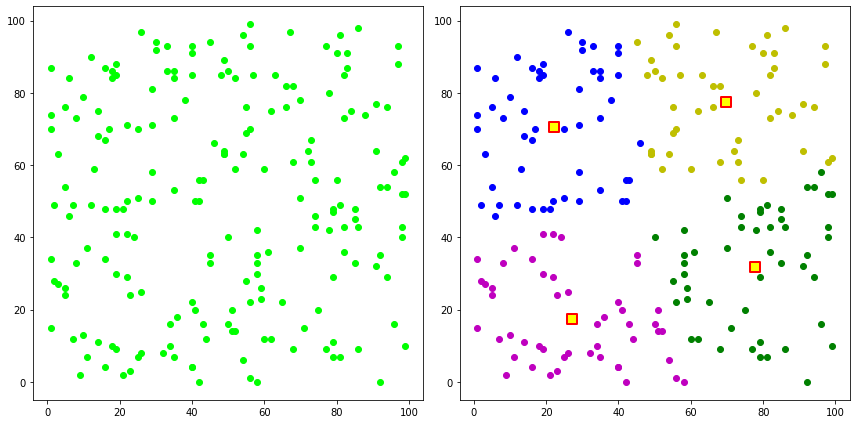

In [29]:
# import numpy
import numpy as np

# import pyplot
import matplotlib.pyplot as plt

# seed = 9
np.random.seed(9)

# generate random integer data between 0-100 of shape (200,2)
data = np.random.randint(0,100,(200,2))

# convert to float32
data = np.float32(data)

# cluster K=4
# criteria 
max_iter = 20
epsilon = 1.0
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# cluster 
K = 4
compactness, label, center = cv.kmeans(data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

print('data: ', data.shape)
print('compactness: ', compactness)
print('label: ', label.shape)
print('center shape: ', center.shape)
print('center: ', center)

# make label single row
label_row = label.ravel()

# sort into group by using bool indexing
A = data[label_row == 0]
B = data[label_row == 1]
C = data[label_row == 2]
D = data[label_row == 3]

# plot original and cluster
fig = plt.figure(figsize=(12, 6))

# original on subplot (1,2,1)

plt.subplot(121)
plt.scatter(data[:,0], data[:,1], c='lime')

# clustered on subplot (1,2,2)
# plot clustered data
plt.subplot(122)
plt.scatter(A[:,0], A[:,1], c='b')
plt.scatter(B[:,0], B[:,1], c='g')
plt.scatter(C[:,0], C[:,1], c='m')
plt.scatter(D[:,0], D[:,1], c='y')

plt.scatter(center[:,0], center[:,1], s=100, c='yellow', marker='s', edgecolors='red', linewidths=2)

# remove spaces
plt.tight_layout()

# clean up
plt.show()



# Example
Find the best compactness for K = [2-10]

{'3': (123085.4613609314, array([[29.414286, 72.557144],
       [37.55224 , 17.80597 ],
       [81.73016 , 58.492065]], dtype=float32)), '4': (84965.18018619716, array([[27.122448, 17.387754],
       [70.299995, 77.18    ],
       [77.22917 , 31.354168],
       [22.132076, 70.58491 ]], dtype=float32)), '5': (67065.63704872131, array([[86.8125  , 44.1875  ],
       [58.394737, 17.5     ],
       [69.02439 , 80.78049 ],
       [17.147058, 20.029411],
       [23.89091 , 70.63636 ]], dtype=float32)), '6': (54836.85071837902, array([[58.394737, 17.5     ],
       [44.555557, 78.      ],
       [14.714286, 66.57143 ],
       [17.48485 , 19.242424],
       [86.8125  , 44.1875  ],
       [78.11539 , 80.96154 ]], dtype=float32)), '7': (45578.74624812603, array([[16.851852, 80.03704 ],
       [26.296297, 10.703704],
       [48.909092, 75.78788 ],
       [64.942856, 19.4     ],
       [14.740741, 42.074074],
       [85.38709 , 48.64516 ],
       [81.35    , 84.15    ]], dtype=float32)), '8': (380

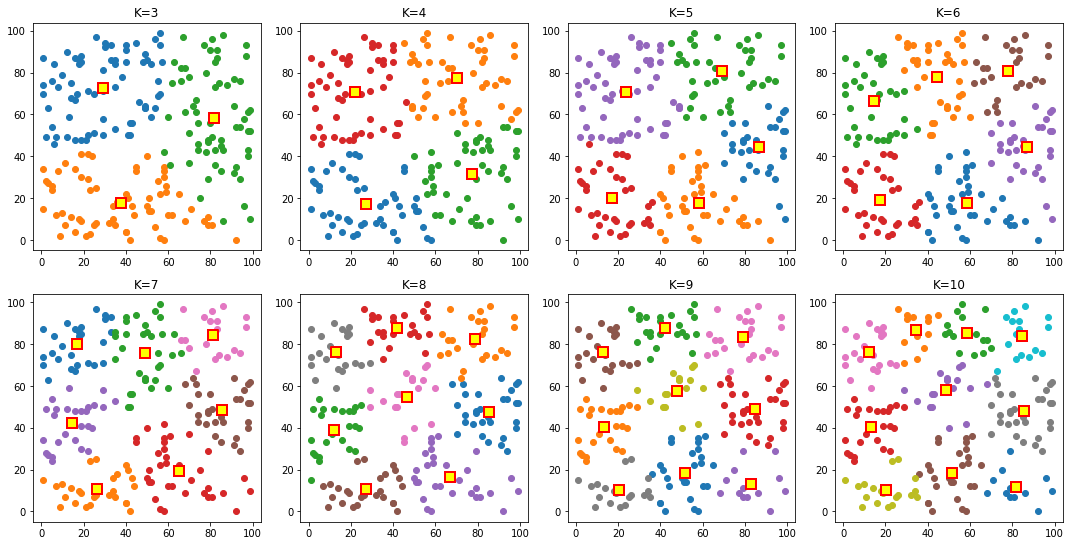

In [39]:
# import numpy
import numpy as np

# import pyplot
import matplotlib.pyplot as plt

# seed = 9
np.random.seed(9)

# generate random integer data between 0-100 of shape (200,2)
data = np.random.randint(0,100,(200,2))

# convert to float32
data = np.float32(data)

# cluster K=4
# criteria 
max_iter = 20
epsilon = 1.0
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# 
# plot original and cluster
fig = plt.figure(figsize=(15, 15))

# cluster 
results = {}
G = []

for p,K in enumerate(range(3, 11)):
    compactness, label, center = cv.kmeans(data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    results[str(K)] = compactness, label, center

    # make label single row
    label_row = label.ravel()

    plt.subplot(4,4,p+1)
    plt.title(f'K={K}')

    G = []
    for i in range(K):
        # sort into group by using bool indexing
        G.insert(i, data[label_row == i])
        # plot clustered data
        plt.scatter(G[i][:,0], G[i][:,1])
        plt.scatter(center[:,0], center[:,1], s=100, c='yellow', marker='s', edgecolors='red', linewidths=2)

# dictionary Comprehesion
dictCompactness =  {k: (v[0], v[2]) for k,v in results.items()}
print(dictCompactness)


# remove spaces
plt.tight_layout()

# clean up
plt.show()



## K-Means Clustering for Color Quantization


compactness:  525453732.45666105
label:  (175508, 1)
center:  (3, 3)


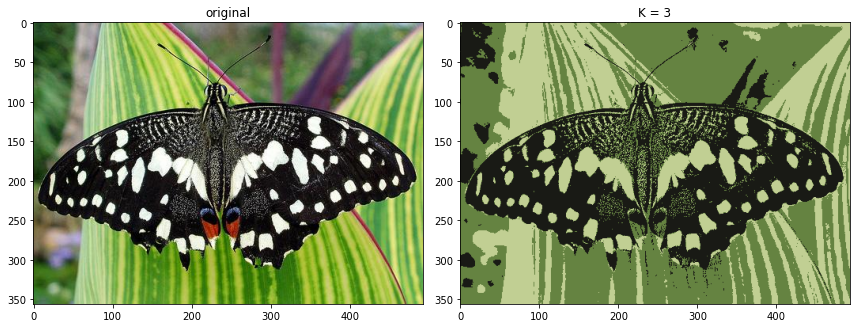

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '../samples/data/butterfly.jpg'

img = cv.imread(filename)


plt.figure(figsize=(12, 6))

# BGR to RGB
imgRGB = img[:, :, ::-1]
plt.subplot(1, 2, 1)
plt.imshow(imgRGB)
plt.title('original')

# img to data (2 D)
data = np.float32(img).reshape((-1, 3))

# criteria
max_iter = 20
epsilon = 1.0
criteria = (cv.TERM_CRITERIA_EPS +
            cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# cluster
K = 3
compactness, label, center = cv.kmeans(
    data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

print('compactness: ', compactness)
print('label: ', label.shape)
print('center: ', center.shape)

# img to k center colors
# convert center float32 to uint8
center = np.uint8(center)

# replace pixel values with their center value
imgNew = center[label.flatten()]
imgNew = imgNew.reshape(img.shape)


# BGR to RGB
imgRGB = imgNew[:, :, ::-1]
plt.subplot(1, 2, 2)
plt.imshow(imgRGB)
plt.title(f'K = {K}')

plt.tight_layout()
plt.show()


## Class Activity
Convert image ca.[ext] through colot quantization using kmean K=4.

compactness:  741104494.0471439
label:  (401220, 1)
center:  (2, 3)


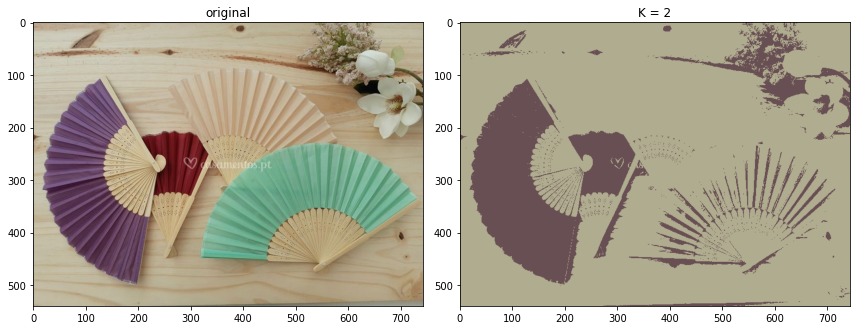

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = 'assets/ca.jpg'

img = cv.imread(filename)


plt.figure(figsize=(12, 6))

# BGR to RGB
imgRGB = img[:, :, ::-1]
plt.subplot(1, 2, 1)
plt.imshow(imgRGB)
plt.title('original')

# img to data (2 D)
data = np.float32(img).reshape((-1, 3))

# criteria
max_iter = 20
epsilon = 1.0
criteria = (cv.TERM_CRITERIA_EPS +
            cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# cluster
K = 2
compactness, label, center = cv.kmeans(
    data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

print('compactness: ', compactness)
print('label: ', label.shape)
print('center: ', center.shape)

# img to k center colors
# convert center float32 to uint8
center = np.uint8(center)

# replace pixel values with their center value
imgNew = center[label.flatten()]
imgNew = imgNew.reshape(img.shape)


# BGR to RGB
imgRGB = imgNew[:, :, ::-1]
plt.subplot(1, 2, 2)
plt.imshow(imgRGB)
plt.title(f'K = {K}')

plt.tight_layout()
plt.show()


Refactoring functions and making code compact


In [94]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import collections


def fromBRGtoRGB(img):
    # BGR to RGB
    return img[:, :, ::-1]


def colorQuantization(data, shape,
                      # criteria
                      max_iter=20,
                      epsilon=1.0,
                      criteria=(cv.TERM_CRITERIA_EPS + \
                                cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon),
                      # cluster
                      K=3
                      ):

    compactness, label, center = cv.kmeans(
        data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

    print('compactness: ', compactness)
    print('label: ', label.shape)
    print('center: ', center.shape)

    # img to k center colors
    # convert center float32 to uint8
    center = np.uint8(center)

    # replace pixel values with their center value
    imgNew = center[label.flatten()]
    imgNew = imgNew.reshape(shape)

    # color distribution
    legendWidth = imgNew.shape[1]
    legendHeight = 70
    # white background image
    imgColorLegend = np.ones(
        (legendHeight, legendWidth, 3), dtype='uint8') * 255

    # 
    total = imgNew.shape[0] * imgNew.shape[1]
    counter = collections.Counter(label.flatten())
    start = 0
    for key, value in counter.items():
        colorWidth = value * legendWidth // total
        # draw rectangle
        end = start + colorWidth
        ptTopLeft = (start, 0)
        ptBottomRight = (end, 50)
        color = center[key].tolist()
        cv.rectangle(imgColorLegend, ptTopLeft, ptBottomRight, color, -1)
        start = end

    # stack legend and image
    imgNew = np.vstack((imgColorLegend, imgNew))

    return imgNew, compactness, label, center


def plotImage(img, subplotValue, title):
    imgRGB = fromBRGtoRGB(img)
    plt.subplot(subplotValue)
    plt.imshow(imgRGB)
    plt.title(title)


compactness:  525286245.8945273
label:  (175508, 1)
center:  (3, 3)
compactness:  271382406.5850241
label:  (175508, 1)
center:  (5, 3)
compactness:  126771446.63812354
label:  (175508, 1)
center:  (10, 3)
compactness:  66684514.05274561
label:  (175508, 1)
center:  (20, 3)
compactness:  39391250.05860902
label:  (175508, 1)
center:  (40, 3)


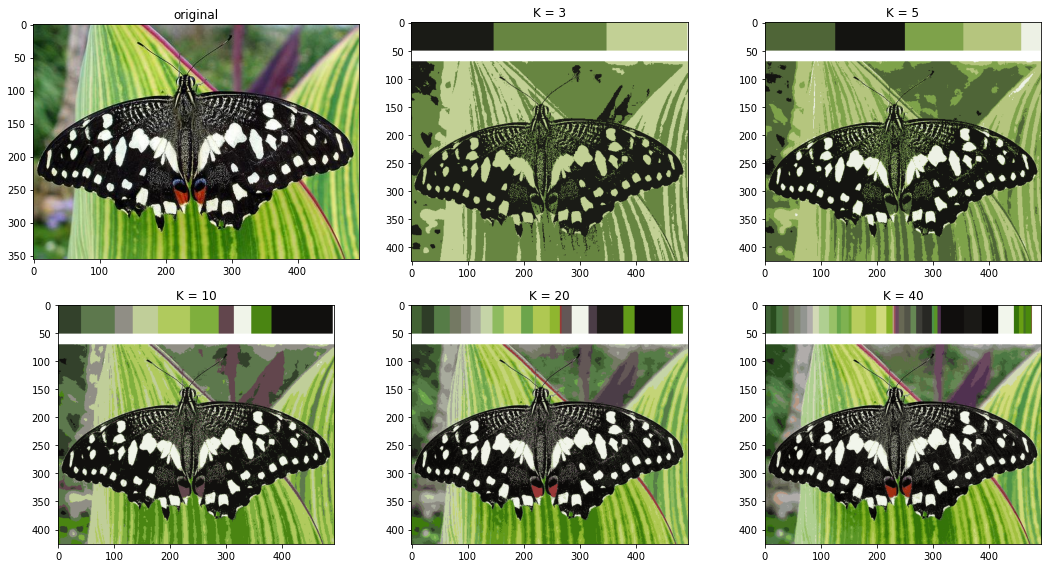

In [95]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '../samples/data/butterfly.jpg'

img = cv.imread(filename)


plt.figure(figsize=(15, 8))

# plot img
plotImage(img, 231, 'original')

# img to data (2 D)
data = np.float32(img).reshape((-1, 3))

max_iter = 20
epsilon = 1.0
criteria = (cv.TERM_CRITERIA_EPS +
            cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# K = 3
imgNew, compactness, label, center = colorQuantization(data, img.shape)
# plot imgNew with K=3
plotImage(imgNew, 232, 'K = 3')

# K = 5
K = 5
imgNew, compactness, label, center = colorQuantization(data, img.shape, max_iter=20, epsilon=1.0,
                                                       criteria=(cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon), K=K)
# plot imgNew
plotImage(imgNew, 233, f'K = {K}')


# K
K = 10
imgNew, compactness, label, center = colorQuantization(data, img.shape, K=K)
# plot imgNew
plotImage(imgNew, 234, f'K = {K}')

# K
K = 20
imgNew, compactness, label, center = colorQuantization(data, img.shape, K=K)
# plot imgNew
plotImage(imgNew, 235, f'K = {K}')

# K
K = 40
imgNew, compactness, label, center = colorQuantization(data, img.shape, K=K)
# plot imgNew
plotImage(imgNew, 236, f'K = {K}')

plt.tight_layout()
plt.show()


## k-nearest neighbor

![alt](assets/knearest.png)

In the above image the green circle is classified as triangle when k = 3 and square when k = 5.

`retval, results, neighborResponses, dist=cv2.ml_KNearest.findNearest(samples, k[, results[, neighborResponses[, dist]]])`

result: [[1.]]
neighbours: [[1. 0. 1.]]
distance: [[205. 324. 425.]]


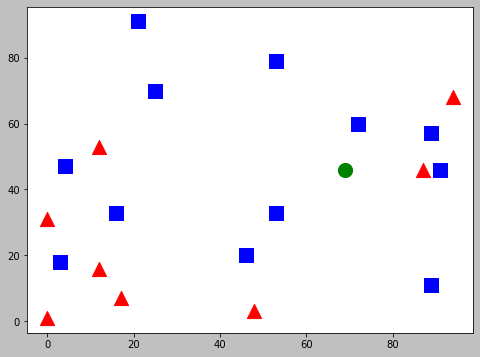

In [109]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt

# 
data = np.random.randint(0, 100, (20, 2)).astype(np.float32)
# We create the labels (0: red, 1: blue) for each of the 16 points:
labels = np.random.randint(0, 2, (20, 1)).astype(np.float32)
# Create the sample point to be classified:
sample = np.random.randint(0, 100, (1, 2)).astype(np.float32)

# k-NN creation:
knn = cv.ml.KNearest_create()
# k-NN training:
knn.train(data, cv.ml.ROW_SAMPLE, labels)
# k-NN find nearest:
k = 3
ret, results, neighbours, dist = knn.findNearest(sample, k)

# Plot all the data and print the results:
# Create the dimensions of the figure:
fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('silver')
# Take points with label 0 (will be the red triangles) and plot them:
red_triangles = data[labels.ravel() == 0]
plt.scatter(red_triangles[:, 0], red_triangles[:, 1], 200, 'r', '^')

# Take points with label 1 (will be the blue squares) and plot them:
blue_squares = data[labels.ravel() == 1]
plt.scatter(blue_squares[:, 0], blue_squares[:, 1], 200, 'b', 's')

# Plot the sample point:
plt.scatter(sample[:, 0], sample[:, 1], 200, 'g', 'o')


# Print results:
print("result: {}".format(results))
print("neighbours: {}".format(neighbours))
print("distance: {}".format(dist))

In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '../samples/data/digits.png'
imgGray = cv.imread(filename, cv.IMREAD_GRAYSCALE)

print(imgGray.shape)

#### get all the digits
IMG_SIZE = 20

rowNum = imgGray.shape[0] / IMG_SIZE
colNum = imgGray.shape[1] / IMG_SIZE

rows = np.vsplit(imgGray, rowNum)

digits = []
for row in rows:
    rowCells = np.hsplit(row, colNum)
    for digit in rowCells:
        digits.append(digit)

# convert list to np.array
digits = np.array(digits)
print('digits', digits.shape)

# labels
DIGITS_CLASS = 10
repeatNum = len(digits) / DIGITS_CLASS
labels = np.repeat(np.arange(DIGITS_CLASS), repeatNum)
print('labels', labels.shape)

#### get features
features = []
for digit in digits:
    img_pixel = np.float32(digit.flatten())
    features.append(img_pixel)

features = np.squeeze(features)
print('features', features.shape)

# shuffle features and labels
# seed random for constant random value
rand = np.random.RandomState(321)
shuffle = rand.permutation(features.shape[0])
features, labels = features[shuffle], labels[shuffle]

# split into training and testing 
splitRatio = [1, 1]
sumRatio = sum(splitRatio)
partition = np.array(splitRatio) * len(features) // sumRatio
partition = np.cumsum(partition)

featureTrain, featureTest = np.array_split(features, partition[:-1])
labelTrain, labelTest = np.array_split(labels, partition[:-1])

print('featureTrain', featureTrain.shape)
print('featureTest', featureTrain.shape)
print('labelTrain', labelTrain.shape)
print('labelTest', labelTest.shape)

# Train the KNN model:
print('Training KNN model')
knn = cv.ml.KNearest_create()
knn.train(featureTrain, cv.ml.ROW_SAMPLE, labelTrain)

# Test the created model:
k = 5
ret, prediction, neighbours, dist = knn.findNearest(featureTest, k)

# Compute the accuracy:
accuracy = (np.squeeze(prediction) == labelTest).mean() * 100
print("Accuracy: {}".format(accuracy))



(1000, 2000)
digits (5000, 20, 20)
labels (5000,)
features (5000, 400)
featureTrain (2500, 400)
featureTest (2500, 400)
labelTrain (2500,)
labelTest (2500,)
Training KNN model
Accuracy: 92.08


## Class Activity
Find the accuracy in a `for` loop for k = 1 to 10 

In [37]:
x = np.arange(10)
print(x)

rand = np.random.RandomState(1)
rand.permutation(x)

[0 1 2 3 4 5 6 7 8 9]


array([2, 9, 6, 4, 0, 3, 1, 7, 8, 5])

## Statistics
